## Audio `Visualizer`

In [5]:
%pip install noisereduce 
%pip install matplotlib
%pip install pydub


Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement matplotlib--upgrade (from versions: none)
ERROR: No matching distribution found for matplotlib--upgrade
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the audio file
audio_path = "/home/wambugumuchemi/Projects/listen-write/cleansegment1.mp3"
audio = AudioSegment.from_file(audio_path)

In [10]:
# Extract the raw audio data as NumPy array
samples = np.array(audio.get_array_of_samples())

In [11]:
# Calculate time values for the x-axis
duration = len(samples) / audio.frame_rate
time = np.linspace(0., duration, len(samples))

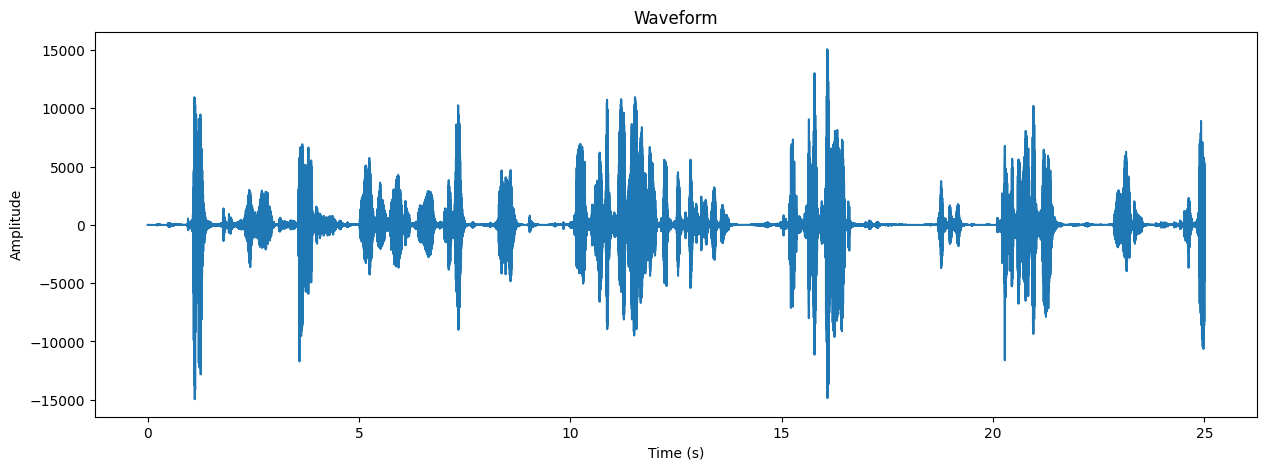

In [12]:
# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(time, samples)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [15]:
#Lets create a function from above
def plot_waveform(audio_path):
    # Load the audio file
    audio = AudioSegment.from_file(audio_path)

    # Extract the raw audio data as NumPy array
    samples = np.array(audio.get_array_of_samples())

    # Calculate time values for the x-axis
    duration = len(samples) / audio.frame_rate
    time = np.linspace(0., duration, len(samples))

    # Plot the waveform
    plt.figure(figsize=(15, 5))
    plt.plot(time, samples)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

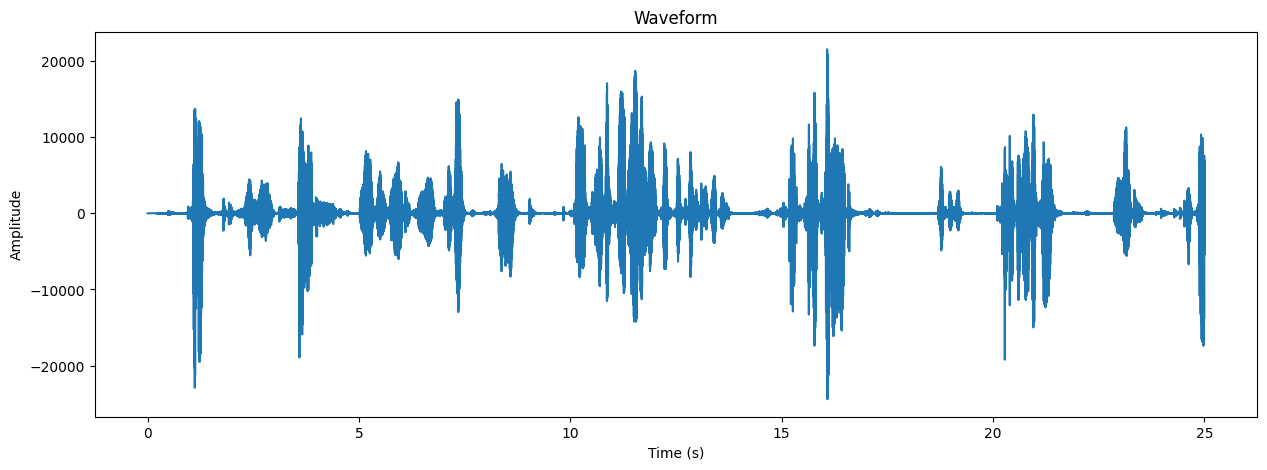

In [18]:
audio_file_path = "/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3"
plot_waveform(audio_file_path)


 Audio `cleaning` : 
 *We will clean the audio using pydub and the noise reduce library*

In [22]:
from pydub import AudioSegment
import noisereduce as nr
import numpy as np

In [23]:
#Lets create a cleaning function
def clean_audio_advanced(audio_path, output_path):
    # Load audio
    audio = AudioSegment.from_file(audio_path, format="mp3")

    # Convert to NumPy array
    audio_array = np.array(audio.get_array_of_samples())

    # Provide the sampling rate (replace 'your_sampling_rate' with the actual value)
    sr = audio.frame_rate

    # Perform noise reduction using noisereduce
    reduced_audio_array = nr.reduce_noise(audio_array, sr)

    # Create a new AudioSegment from the cleaned NumPy array
    cleaned_audio = AudioSegment(
        reduced_audio_array.tobytes(),
        frame_rate=audio.frame_rate,
        sample_width=audio.sample_width,
        channels=audio.channels
    )

    # Export the processed audio to a new file
    cleaned_audio.export(output_path, format="mp3")

In [26]:
audio_path = "/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3"
output_path = "/home/wambugumuchemi/Projects/listen-write/cleaned_audio/clean1.mp3"
clean_audio_advanced(audio_path, output_path)

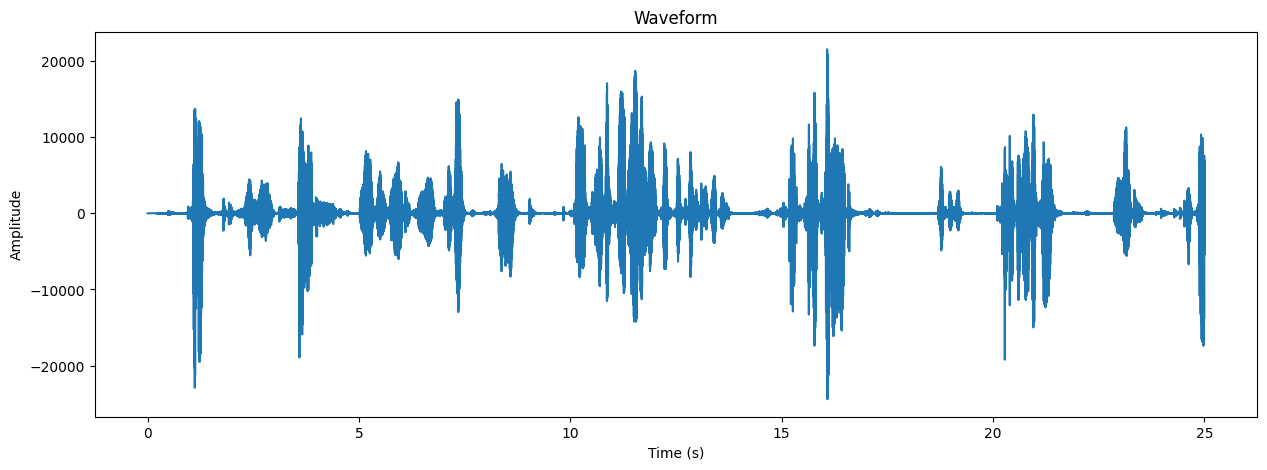

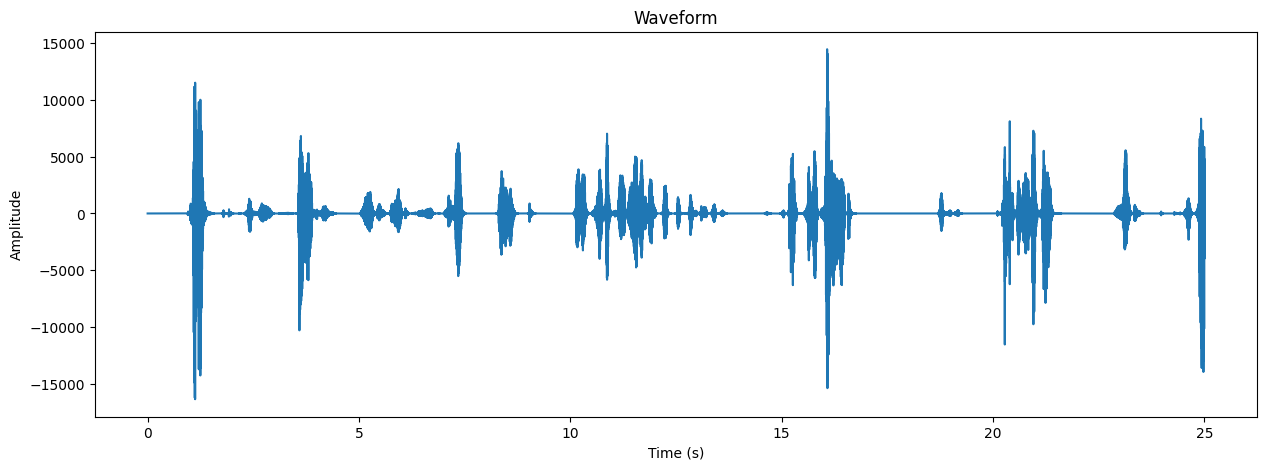

In [27]:
#lets visualize the cleaned audio now, we can plot both non-cleaned and cleaned audio

#non-cleaned audio as first plot
audio_file_path = "/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3"
plot_waveform(audio_file_path)

#cleaned audio as second plot
audio_file_path = "/home/wambugumuchemi/Projects/listen-write/cleaned_audio/clean1.mp3"
plot_waveform(audio_file_path)